In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans #k-means聚类函数
from sklearn.preprocessing import StandardScaler #标准化数据函数
from sklearn.metrics import silhouette_score #轮廓系数函数

In [2]:
data_original = pd.read_csv("Iris.csv")
data_original

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
95,96,5.7,3.0,4.2,1.2,Iris-versicolor
96,97,5.7,2.9,4.2,1.3,Iris-versicolor
97,98,6.2,2.9,4.3,1.3,Iris-versicolor
98,99,5.1,2.5,3.0,1.1,Iris-versicolor


In [3]:
data = data_original[data_original.columns[1:5]]

In [4]:
scaler = StandardScaler()
datax = scaler.fit_transform(data) #将数据标准化

<function matplotlib.pyplot.show(close=None, block=None)>

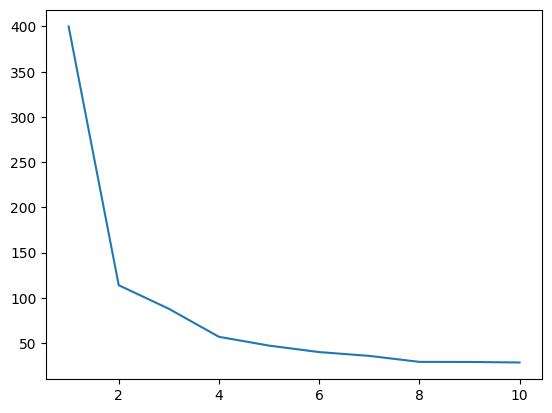

In [10]:
see = [] #记录每个k值的误差平方和
k_range = range(1,11)
for k in k_range:
    kmeans = KMeans(n_clusters = k) #构建模型：测试不同k值在kmeans聚类模型中的误差平方和
    kmeans.fit(datax) #训练模型：找到簇中心，将数据分配到最近的簇
    see.append(kmeans.inertia_) # 提取误差平方和到see变量
plt.plot(k_range, see)
plt.show

观察肘部法则曲线，最佳K值在SSE下降变缓的“拐点” ， 选择k值为2

In [11]:
kmeans = KMeans(n_clusters = 2) 
kmeans.fit(datax)
labels = kmeans.labels_ #提取每个样本的簇标签
centers = kmeans.cluster_centers_ #提取每个簇的坐中心标位置（由于是四维数据，因此位置坐标为四维数组）

In [14]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2) #可视化展示需要将四维数据转换为二维数据，采用主成分分析提取主成分在二维坐标的投影
datax_2d = pca.fit_transform(datax)  
centers_2d = pca.transform(centers) #注意fit只执行一次，这行的pca只transform复用前面的fit的datax数据以保持一致，否则会导致错误！！

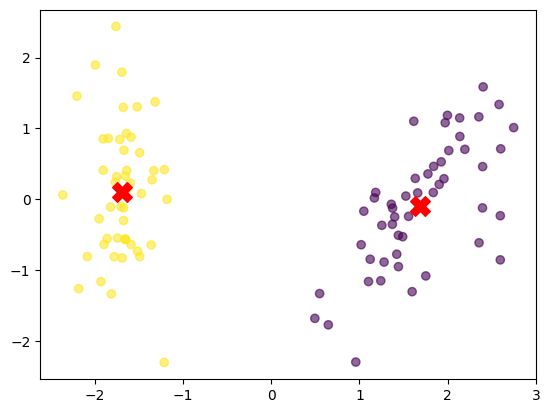

In [8]:
plt.scatter(datax_2d[:,0], datax_2d[:,1], c=labels, cmap='viridis', alpha=0.6)
plt.scatter(centers_2d[:,0], centers_2d[:,1], c="red", marker="X", s=200)
plt.show()

In [16]:
score = silhouette_score(datax, labels)
print(f"轮廓系数: {score:.2f}")   #介于【-1，1】之间，越趋近于1说明分类特征越明显

轮廓系数: 0.63


分析结果：三种鸢尾花在萼片长度、萼片宽度、花瓣长度、花瓣宽度这四个特征上面具有明显的差异，主要分为两类。